## K-Means

K-Means is a clustering algorithm (unsupervised algorithm) that tries to partition the data into clusters given a fixed number of clusters and dataset. The clusters contain data points such that they have high intra-class similarity and low inter-class similarity.<br>

#### Algorithm
The main steps involved in the algorithm is as followed: <br>
1. Initialize the cluster centers, this can be done randomly within the range of input data, or with some of the existing training examples
2. Until convergence - 
    - Assign each data point to the closest cluster. The distance between the data point and cluster center can be measured using Euclidean distance.
    - Update the current estimates of the cluster centers by setting them to the mean of all data points in that cluster

#### Objective funtion
Given a set of datapoints ${x_1, ..., x_n}$ and a positive number $k$, find the clusters $C_1, ..., C_k$ that minimize

$$
J = \sum_{i=1}^n \, \sum_{j=1}^k \, z_{ij} \, || x_i - \mu_j ||_2
$$

where:

- $z_{ij} \in \{0,1\}$ defines whether of not datapoint $x_i$ belongs to cluster $C_j$
- $\mu_j$ denotes the cluster center of a cluster $C_j$
- $|| \, ||_2$ denotes the Euclidean distance

#### Disadvantages of K-Means
- The number of clusters is pre-defined
- The results depend on initial clusters centers
- It is sensitive to outliers
- It does not guarantee finding global optimum

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

np.random.seed(2019)

### Data

Shape of dataset: (1500, 2)


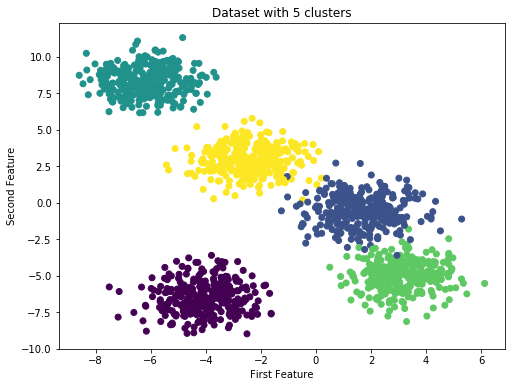

In [17]:
X, y = make_blobs(centers=5, n_samples=1500)
print(f'Shape of dataset: {X.shape}')

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Dataset with 5 clusters')
plt.ylabel('Second Feature')
plt.xlabel('First Feature')

plt.show()

### K-Means Class

In [26]:
class KMeans():
    def __init__(self, n_clusters=5):
        self.k = n_clusters
     
    def distance(self, datapoint):
        return np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
    
    def classify(self, datapoint):
        dists = self.distance(datapoint)
        return np.argmin(dists)
    
    def fit(self, data):
        n_samples = data.shape[0]
#         Initialize cluster centers
        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)
        print(f'Initial centers are: {self.initial_centers}')
#         We know the objective function is minimized when the assignment of data points stop changing
        old_assignments = None
        iterations = 0
        
        while True:
            new_assignments = [self.classify(datapoint) for datapoint in data]
            if new_assignments == old_assignments:
                print(f'Training finished after {iterations} iterations')
                return
            old_assignments = new_assignments
            iterations += 1
            
#             Calculating updated centers 
            for i in range(self.k):
                points = np.where(np.array(new_assignments) == i)
                datapoints = data[points]
                self.centers[i] = datapoints.mean(axis=0)
    
    def plot(self, data):
        plt.figure(figsize=(8,6))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:,0], data[:,1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k')
        plt.show()

### Initialization and training of the model

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

Initial centers are: [[-6.24276039  7.93664722]
 [ 1.16193618 -0.85229761]
 [-7.18411764 -7.8419168 ]
 [ 2.4963088  -4.52411788]
 [-5.61601757  8.24876028]]
Training finished after 6 iterations


### Plotting initial and final centers of clusters

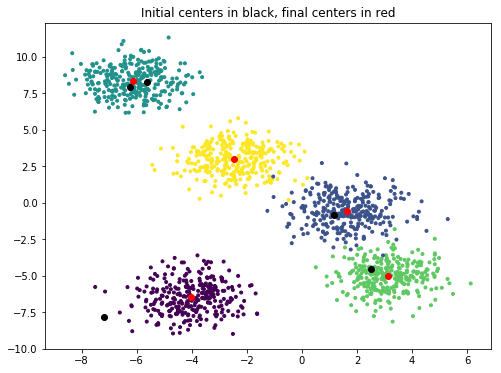

In [28]:
kmeans.plot(X)